#Hamidreza Aliakbary khoyi
##810196514
###Question 2

In [1]:
import pandas as pd
import numpy as np
import numpy.matlib
import math 
from numpy import linalg as LA
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW3/Reduced_Train_Data.csv', header = None)
test_data = pd.read_csv('/content/drive/My Drive/IS/IS_HW3/Reduced_Test_Data.csv', header = None)
train_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW3/trainLabels.csv', header = None)
test_labels = pd.read_csv('/content/drive/My Drive/IS/IS_HW3/testLabels.csv', header = None)

In [4]:
train_labels.iloc[:,0].unique()



array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8])

I used OOP to build model total elements including layers activation functions,... . here below you can see layer class that i implement it to set a layer of nodes . it's attributes are weights learning rate and weights and there is a flag that shows whether this layer is input layer or not. two main methods of this class is back propagation and forward part. we will set biases to just get learning of model .

In [5]:
class layer :

    def __init__ ( self , n_inputs , n_neurons , lambdaa = 0.1, is_input = 0):
        self.weights = 0.0001 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros(( 1 , n_neurons))
        self.lambdaa = lambdaa
        self.is_input = is_input

    def forward ( self , inputs ):
        self.inputs = inputs
        if self.is_input :
            self.output = self.inputs
        else:
            self.output = np.dot(inputs, self.weights) + self.biases

    def backward ( self , dvalues ):
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis = 0 , keepdims = True )
        self.dweights += 2 * self.lambdaa * self.weights
        self.dbiases += 2 * self.lambdaa * self.biases
        self.dinputs = np.dot(dvalues, self.weights.T)
            

Testing layer:

In [6]:
temp = 1000000*np.random.randn(13,2)
dense = layer(2,3)
dense.forward(temp)
hidd = layer(3,3)
hidd.forward( dense.output )
last = layer(3,2)
last.forward( hidd.output )
print(last.output)
print(temp)


[[-3.20872079e-06 -7.66527433e-06]
 [ 8.11176840e-08  7.77872517e-07]
 [ 7.68882785e-07  3.27445976e-06]
 [ 1.49211859e-06  2.82277664e-06]
 [ 1.35884177e-06  3.12320488e-06]
 [-2.47268211e-06 -5.37650869e-06]
 [ 5.87648088e-07  8.37286017e-07]
 [ 6.29086623e-07  1.39265493e-06]
 [-5.57082005e-07  6.56315762e-08]
 [ 1.06987114e-06  1.34351634e-06]
 [-1.19130498e-07 -7.57661013e-07]
 [-6.66803827e-07 -1.95334310e-06]
 [ 1.82622493e-06  5.41886102e-06]]
[[-2355552.36888012  -944650.17435847]
 [  274206.26619526  -760787.41974347]
 [ 1092801.71942829 -1705026.38216662]
 [  822789.27259322  1435717.7160333 ]
 [  952366.36079523   565169.28244569]
 [-1620275.30278321 -1440568.65237253]
 [  223191.51530817   934093.2001819 ]
 [  421333.09878935   333195.95887236]
 [  104239.90916254 -2039980.45390858]
 [  339880.44186633  1943555.9942967 ]
 [ -261311.39135161   600452.32649154]
 [ -621964.74087484   287885.33617447]
 [ 1728813.95328009  -881276.29631416]]


This class will illustrate as usage of activation functions. there will be 3 kind of activation functions here including Sigmoid and Relu and Tanh. eaxh are impelemnted below and all 3 kind are sperated with if consition in 2 main methods of forward an backward.


In [7]:
class activation :

    def __init__ ( self , mode ):
        self.mode = mode
        self.inputs = 0
        self.dinputs = 0
        self.output = 0

    def forward ( self , inputs ):
        self.inputs = inputs
        if self.mode == 'Relu' :
            self.output = np.maximum( 0 , inputs)
        elif self.mode == 'Sigmoid' :
            self.output = 1 / ( 1 + np.exp( - self.inputs))
        elif self.mode == 'Tanh' :
            self.output = ( 2/(1 + np.exp( -2*self.inputs ))) + 1


    def backward ( self , dvalues ):
        if self.mode == 'Relu' :
            self.dinputs = dvalues.copy()
            self.dinputs[self.inputs <= 0 ] = 0
        elif self.mode == 'Sigmoid' :
            self.dinputs = dvalues * ( 1 - self.output) * self.output
        elif self.mode == 'Tanh' :
            self.dinputs = 1 - (( 2/(1 + np.exp( -2*self.output ))) + 1)**2

Testing activation functions:

In [8]:
temp = np.random.randn(2,3)
print(temp)
relu = activation('Tanh')
relu.forward(temp)
print(relu.output)
relu.backward(temp)
print(relu.inputs)
print(relu.dinputs)

[[-0.40619272 -1.34376028 -0.00221861]
 [-0.70291945 -1.07964596 -0.92004639]]
[[1.61476481 1.12742754 1.99778139]
 [1.3937824  1.20693223 1.27408064]]
[[-0.40619272 -1.34376028 -0.00221861]
 [-0.70291945 -1.07964596 -0.92004639]]
[[-7.54896351 -6.89686998 -7.78452833]
 [-7.3174576  -7.04151715 -7.15045276]]


We need an optimizer to just get to a global minimum , here we used SGD as desired optimizer. this implementation is as same as project one.

In [9]:
class SGD :

    def __init__ ( self , learning_rate = 1. , decay = 0.1 ):

        self.learning_rate = learning_rate
        self.decay = decay
        self.iterations = 1

    def update_params ( self , layer ):
        weight_updates = - self.learning_rate * layer.dweights
        bias_updates = - self.learning_rate * layer.dbiases
        layer.weights += weight_updates
        layer.biases += bias_updates
    def increment(self):
        self.iterations += 1
        self.learning_rate = self.learning_rate * ( 1. / ( 1. + self.decay * self.iterations))

here we use Mean Squared error loss to calculate loss of our model for each layer and update parameters based on this. this class has 2 main methods as backward and forward. this class places after last activation function of last layer and then with this class we start Backpropagation process. it has a methos of calculate loss for depicting result.


In [10]:
class Loss_MSE :

    def __init__ ( self ):
        pass
        
    def forward ( self , y_pred , y_true ):
        sample_losses = np.mean((y_true - y_pred) ** 2 , axis =- 1 )
        return sample_losses

    def backward ( self , dvalues , y_true ):
        samples = len (dvalues)
        outputs = len (dvalues[ 0 ])
        self.dinputs = - 2 * (y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples

    def calculate_loss ( self , layers , output , y ):
        regularization_loss = 0
        for layer in layers:
            regularization_loss += layer.lambdaa * np.sum(layer.weights * layer.weights)
            regularization_loss += layer.lambdaa * np.sum(layer.biases * layer.biases)
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss 

Testing

In [11]:
mse = Loss_MSE()
mse.forward(np.array([0,0,0,1,1,10,1,0,1]), np.array([1,88,1,0,1,0,1,0,1]))

871.8888888888889

drop out layer is a layer that places between layers to just cancel weghts of randomlly selected nodes with binomial distribution. it is simple and has 2 methods of forward ad back ward. we will generate a tesor of 0s and 1s as large as inputs of layer and then set 0 and one based on dropout rate and binomial sitribuiton with just getting it's samples.

In [12]:
class drop_out_layer :

    def __init__ ( self , rate ):
        self.rate = rate

    def forward ( self , inputs ):
        self.inputs = inputs
        self.chosen = np.random.binomial( 1 , self.rate, size = inputs.shape) / self.rate
        self.output = inputs * self.chosen

    def backward ( self , dvalues ):
        self.dinputs = dvalues * self.chosen

Testing Drop out layer and as you can see it cancels impact of randomly chosen weights.

In [13]:
drop = drop_out_layer(0.5)
temp = np.random.randn(2,4)
print(temp)
drop.forward(temp)
print(drop.output)
print(drop.chosen)


[[ 2.36387881  1.27771024 -0.85241369  0.74830405]
 [-1.2408946  -0.87985115 -0.95869397  1.35177249]]
[[ 4.72775762  2.55542048 -0.          1.4966081 ]
 [-2.4817892  -1.7597023  -1.91738795  0.        ]]
[[2. 2. 0. 2.]
 [2. 2. 2. 0.]]


NN is a giant function that gather all of classes to getheer to build a one hidden-layered neural network with two main modes of either having a dropout mode or not.

First, i just standardize inputs . and then because we use SGD as optimizer i use to shuffle data to just get a better training way. all layers except input layer will have activation function. hidden layer will have desired activation function, though it can be wether Relu or Tanh or Sigmoid. output layer will have sigmoid activation function . if we have Dropout layer we place it befor hidden layer for cancelling some wights to get through dropout feature.

Second, we should train our model with respect to dropout mode status and for range of epochs. in each epoch, first we do all forwardings and the do backwards. after this we will update weights all with derivatives that backpropagates from next layers.

Third, i calculate accuracy of model with getting output of last layer activation function and set a threshold and calculate label. 

In [14]:
def NN(traindata, trainlabel, is_dropout, activation_mode, lambdaa, decay , hidden_nodes, epoches, print_every):
    traindata = traindata.to_numpy()
    n_label = len(trainlabel.iloc[:,0].unique())
    trainlabel = trainlabel.to_numpy()
    traindata = (traindata - np.min(traindata) )/ (np.max(traindata)-np.min(traindata))
    in_size = traindata.shape[1]
    temp  = np.arange(in_size)
    np.random.shuffle(temp)
    traindata = traindata[temp]
    trainlabel = trainlabel[temp]
    activation_2 = activation( 'Sigmoid' )
    #input_layer = layer( traindata.shape[1] , hidden_nodes , lambdaa , is_input = 1 )
    hidden = layer(traindata.shape[1], hidden_nodes, lambdaa)
    output_layer = layer(hidden_nodes , n_label, lambdaa)
    activation_1 = activation( activation_mode )
    loss = Loss_MSE()

    layers = [hidden , output_layer]
    accuracy_precision = np.std(trainlabel)/in_size
    if  is_dropout == 0 :
        losses = np.zeros(epoches)
        for epoch in range(epoches):
        
            #input_layer.forward( traindata )
            hidden.forward( traindata )
            activation_1.forward( hidden.output )
            output_layer.forward( activation_1.output)
            activation_2.forward( output_layer.output )

            losses[epoch] = loss.calculate_loss ( layers , activation_2.output , trainlabel )

            loss.backward( activation_2.output , trainlabel )
            activation_2.backward(loss.dinputs )
            output_layer.backward(activation_2.dinputs)
            activation_1.backward(output_layer.dinputs)
            hidden.backward(activation_1.dinputs)

            predictions = activation_2.output
            accuracy = np.mean(np.absolute(predictions - trainlabel) < accuracy_precision)

            optimizer = SGD(learning_rate = 0.1 , decay = 2)
            optimizer.update_params (hidden)
            optimizer.update_params (output_layer)

            if not epoch % print_every :
                print ( 'epoch : ' + str(epoch) + ' ' + 'acc: ' + str(accuracy) , ' loss : ' + str(losses[epoch]) + ' Learning rate : ' + str(optimizer.learning_rate) )

            optimizer.increment()
    else:
        dropout = drop_out_layer(is_dropout)
        losses = np.zeros(epoches)
        for epoch in range(epoches):
        
            #input_layer.forward( traindata )
            dropout.forward( traindata )
            hidden.forward( dropout.output )
            activation_1.forward( hidden.output )
            output_layer.forward( activation_1.output)
            activation_2.forward( output_layer.output )

            losses[epoch] = loss.calculate_loss ( layers , activation_2.output , trainlabel )

            loss.backward( activation_2.output , trainlabel )
            activation_2.backward(loss.dinputs )
            output_layer.backward(activation_2.dinputs)
            activation_1.backward(output_layer.dinputs)
            hidden.backward(activation_1.dinputs)
            dropout.backward( hidden.dinputs )

            predictions = activation_2.output
            accuracy = np.mean(np.absolute(predictions - trainlabel) < accuracy_precision)

            optimizer = SGD(learning_rate = 0.1 , decay = 2)
            optimizer.update_params (hidden)
            optimizer.update_params (output_layer)

            if not epoch % print_every:
                print ( 'epoch : ' + str(epoch) + ' ' + 'acc: ' + str(accuracy) , ' loss : ' + str(losses[epoch]) + ' Learning rate : ' + str(optimizer.learning_rate) )

            optimizer.increment()
    
    return losses

epoch : 0 acc: 0.0  loss : 22.811106379771623 Learning rate : 0.1
epoch : 3 acc: 0.1171875  loss : 19.234375000000007 Learning rate : 0.1
epoch : 6 acc: 0.1171875  loss : 19.234375000000007 Learning rate : 0.1
epoch : 9 acc: 0.1171875  loss : 19.234375000000007 Learning rate : 0.1
epoch : 12 acc: 0.1171875  loss : 19.23437500000001 Learning rate : 0.1
epoch : 15 acc: 0.1171875  loss : 19.23437500000002 Learning rate : 0.1
epoch : 18 acc: 0.1171875  loss : 19.23437500000002 Learning rate : 0.1
epoch : 21 acc: 0.1171875  loss : 19.23437500000003 Learning rate : 0.1
epoch : 24 acc: 0.1171875  loss : 19.234375000000036 Learning rate : 0.1
epoch : 27 acc: 0.1171875  loss : 19.234375000000043 Learning rate : 0.1
epoch : 30 acc: 0.1171875  loss : 19.234375000000046 Learning rate : 0.1
epoch : 33 acc: 0.1171875  loss : 19.23437500000006 Learning rate : 0.1
epoch : 36 acc: 0.1171875  loss : 19.234375000000075 Learning rate : 0.1
epoch : 39 acc: 0.1171875  loss : 19.234375000000092 Learning rate

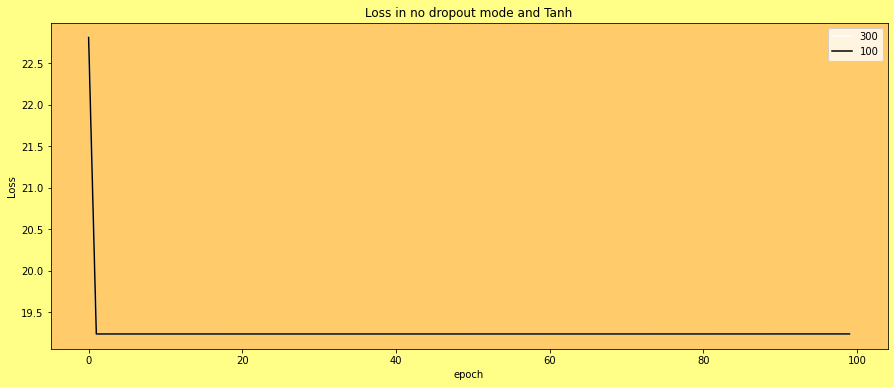

In [15]:
loss3 = NN(train_data, train_labels, 0, 'Tanh', 0.01,0.1 , 300, 100,3)
loss1 = NN(train_data, train_labels, 0, 'Tanh', 0.01,0.1 , 100, 100,3)
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(loss3, color='white')
ax.plot(loss1, color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Loss in no dropout mode and Tanh')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['300','100'])
plt.show()

Unfortunately model does not learn after first epoch and i dont know why, i tried to debug it, but i couldn't. as we can see there is a decrease in loss and this means backpropagation works well. for Tanh  and 100 nodes i got this figure for illustrating loss devtation . since it does not learn so totall accuracy is about 11 percent.

epoch : 0 acc: 0.0  loss : 22.81250008353743 Learning rate : 0.1
epoch : 3 acc: 0.0  loss : 22.703193971816898 Learning rate : 0.1
epoch : 6 acc: 0.0  loss : 22.595665942872024 Learning rate : 0.1
epoch : 9 acc: 0.0  loss : 22.490194126783273 Learning rate : 0.1
epoch : 12 acc: 0.0  loss : 22.38697510128656 Learning rate : 0.1
epoch : 15 acc: 0.0  loss : 22.286009821385946 Learning rate : 0.1
epoch : 18 acc: 0.0  loss : 22.18674973977271 Learning rate : 0.1
epoch : 21 acc: 0.0  loss : 22.08699753733351 Learning rate : 0.1
epoch : 24 acc: 0.0  loss : 21.97957469109563 Learning rate : 0.1
epoch : 27 acc: 0.0  loss : 21.842745338541437 Learning rate : 0.1
epoch : 30 acc: 0.0  loss : 21.616658764713918 Learning rate : 0.1
epoch : 33 acc: 0.0  loss : 21.17665522325956 Learning rate : 0.1
epoch : 36 acc: 0.0  loss : 20.473225712754672 Learning rate : 0.1
epoch : 39 acc: 0.0  loss : 19.870827507147197 Learning rate : 0.1
epoch : 42 acc: 0.0  loss : 19.579102256446117 Learning rate : 0.1
epoch

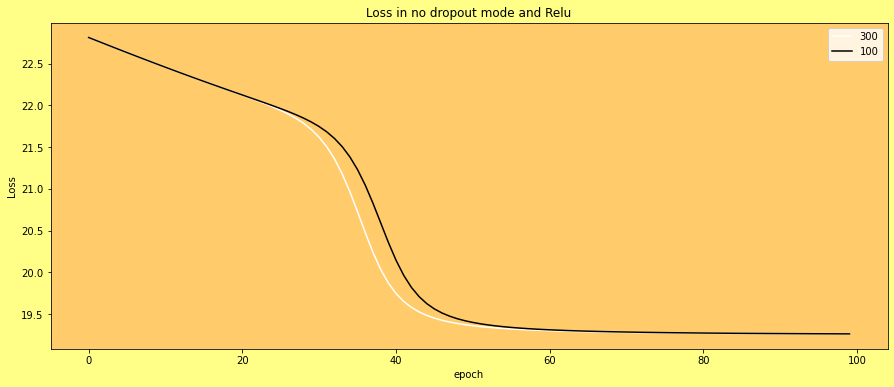

In [16]:
loss3 = NN(train_data, train_labels, 0, 'Relu', 0.01,0.1 , 300, 100,3)
loss1 = NN(train_data, train_labels, 0, 'Relu', 0.01,0.1 , 100, 100,3)
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(loss3, color='white')
ax.plot(loss1, color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Loss in no dropout mode and Relu')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['300','100'])
plt.show()

As we can see here this means backpropagation works well because of decreasing in loss. with 300 nodes loss begins to decrease earlier than model with 100 nodes. 

epoch : 0 acc: 0.0  loss : 22.812499714215946 Learning rate : 0.1
epoch : 3 acc: 0.0  loss : 22.70318727479122 Learning rate : 0.1
epoch : 6 acc: 0.0  loss : 22.595650494664056 Learning rate : 0.1
epoch : 9 acc: 0.0  loss : 22.490160740225626 Learning rate : 0.1
epoch : 12 acc: 0.0  loss : 22.386858613577818 Learning rate : 0.1
epoch : 15 acc: 0.0  loss : 22.285613375094815 Learning rate : 0.1
epoch : 18 acc: 0.0  loss : 22.18544282152366 Learning rate : 0.1
epoch : 21 acc: 0.0  loss : 22.083092663432655 Learning rate : 0.1
epoch : 24 acc: 0.0  loss : 21.96804917614631 Learning rate : 0.1
epoch : 27 acc: 0.0  loss : 21.806650482808394 Learning rate : 0.1
epoch : 30 acc: 0.0  loss : 21.533146596552918 Learning rate : 0.1
epoch : 33 acc: 0.0  loss : 20.959334215616263 Learning rate : 0.1
epoch : 36 acc: 0.0  loss : 20.239705753439658 Learning rate : 0.1
epoch : 39 acc: 0.0  loss : 19.80480335983348 Learning rate : 0.1
epoch : 42 acc: 0.015625  loss : 19.61458875215131 Learning rate : 0.1

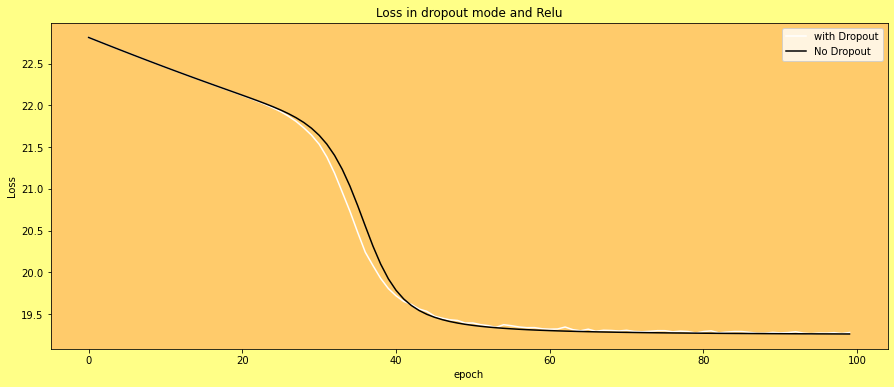

In [17]:
loss1 = NN(train_data, train_labels, 0.1, 'Relu', 0.01,0.1 , 300, 100,3)
loss2 = NN(train_data, train_labels, 0, 'Relu', 0.01,0.1 , 300, 100,3)
fig = plt.figure(figsize=(15,6))
fig.patch.set_facecolor('yellow')
fig.patch.set_alpha(0.47)
ax = fig.add_subplot(111)
ax.plot(loss1, color='white')
ax.plot(loss2, color='Black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.2)
plt.title('Loss in dropout mode and Relu')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['with Dropout', 'No Dropout'])
plt.show()

as we see backpropagation works for both Relo with dropoutlayer and without dropout layer. but we can see some fluctuation in model woth dropout and this is because of randomness of this choice. in model with dropout , model will start to decrease in loss earlier that model with no dropout.